## Mathematical Methods for Engineers (MathEng)
## EXAM
#### 11th February 2020
```
Duration: 2 hrs, calculators permitted, no documents
This exam paper contains 7 questions and 40 marks.
ATTEMPT ALL QUESTIONS – ANSWER IN ENGLISH
```

In [1]:
using Plots
using LaTeXStrings

### 1. Via any appropriate method, and by justifying your response, write an expression for the Fourier transform of $x(t) = \cos w_0t$.
[5 marks]

---
The Fourier transform of $ x(t) = \cos(\omega_0 t) $ can be derived using the definition of the Fourier transform:

$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} dt
$

### Step 1: Express $ \cos(\omega_0 t) $ in terms of exponentials

We can use Euler's formula to rewrite $ \cos(\omega_0 t) $ as a sum of complex exponentials:

$
\cos(\omega_0 t) = \frac{1}{2} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right)
$

### Step 2: Apply the Fourier transform to each exponential term

We now take the Fourier transform of each term separately. The Fourier transform of $ e^{j \omega_0 t} $ and $ e^{-j \omega_0 t} $ are well known:

- The Fourier transform of $ e^{j \omega_0 t} $ is a delta function shifted to $ f = \frac{\omega_0}{2\pi} $:

$
\mathcal{F}\{e^{j \omega_0 t}\} = \delta\left(f - \frac{\omega_0}{2\pi}\right)
$

- Similarly, the Fourier transform of $ e^{-j \omega_0 t} $ is a delta function shifted to $ f = -\frac{\omega_0}{2\pi} $:

$
\mathcal{F}\{e^{-j \omega_0 t}\} = \delta\left(f + \frac{\omega_0}{2\pi}\right)
$

### Step 3: Combine the results

Thus, the Fourier transform of $ \cos(\omega_0 t) $ becomes:

$
\boxed{
X(f) = \frac{1}{2} \left[ \delta\left(f - \frac{\omega_0}{2\pi}\right) + \delta\left(f + \frac{\omega_0}{2\pi}\right) \right]
}
$

This is the final expression for the Fourier transform of $ \cos(\omega_0 t) $. It consists of two delta functions located at $ f = \pm \frac{\omega_0}{2\pi} $, indicating that the cosine function contains frequency components at $ \pm \frac{\omega_0}{2\pi} $.

### Justification

The result makes sense because the cosine function is a combination of two complex exponentials, each contributing a distinct frequency. The delta functions reflect these frequency components in the frequency domain, with equal magnitude contributions at positive and negative frequencies.

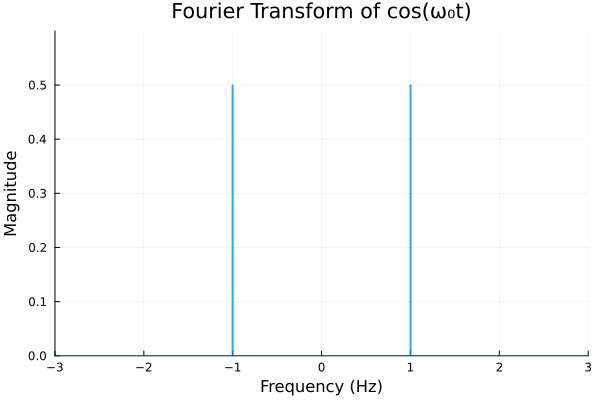

In [2]:
# Parameters
threshold = 0.01 # The threshold for identifying delta spikes
magnitude = 0.5  # Spike's magnitude
ω₀ = 2π          # example frequency in rad/s
f₀ = ω₀ / 2π     # corresponding frequency in Hz

# Frequency range
frequencies = range(-5f₀, stop=5f₀, length=1000)
𝑋𝑓 = zeros(length(frequencies))

# Delta functions at ±f₀
𝑋𝑓[findall(abs.(frequencies .- f₀) .< threshold)] .= magnitude
𝑋𝑓[findall(abs.(frequencies .+ f₀) .< threshold)] .= magnitude

# Plot the Fourier transform with delta spikes
plot(frequencies, 𝑋𝑓
    , st=:stem, label="Fourier Transform"
    , xlabel="Frequency (Hz)", ylabel="Magnitude"
    , title="Fourier Transform of cos(ω₀t)"
    , grid = true, legend = false
    , xlims= (-3f₀, 3f₀), ylims = (0, 0.6)    
)

Here is the plot of the Fourier transform of $ \cos(\omega_0 t) $. The two delta spikes are located at $ \pm f_0 $, showing the frequency components at $ f_0 = \frac{\omega_0}{2\pi} $. Each spike has a magnitude of 0.5, reflecting the equal contributions of the positive and negative frequency components in the cosine function.

### 2. Sketch the s-plane pole-zero plot for a system with the following transfer function and then sketch the amplitude frequency response.

$$
𝐻(𝑠) = \frac{s^2 + 9}{(𝑠^2 + 0.6𝑠 + 4.09)}
$$

[5marks]

In [3]:
# Define poles and zeros
zrs = [im * 3, -im * 3]      # Zeros at ±j3
poles = [-0.3 + 2im, -0.3 - 2im]  # Poles at -0.3 ± j2

# Pole-zero plot
p1 = plot(real(zrs), imag(zrs)
    , seriestype = :scatter, label="Zeros", legend=:topright
    , xlims = (-5, 5), ylims = (-5, 5)

)
plot!(real(poles), imag(poles)
    , seriestype = :scatter, label="Poles", marker=:x
    , xlabel = "Re(s)", ylabel = "Im(s)" , title = "Pole-Zero Plot"
)

hline!([0], line=:solid, color=:black, linewidth=0.5)
vline!([0], line=:solid, color=:black, linewidth=0.5)

# Define the transfer function H(s)
H(s) = (s^2 + 9) / (s^2 + 0.6 * s + 4.09)

# Frequency range for the amplitude response plot
ω = range(0, stop=10, length=500)
H_vals = abs.(H.(j .* ω))

# Plot the amplitude frequency response
plot(omega, H_vals
    , xlabel=L"Frequency (\omega)", ylabel=L"|H(j\omega)|"
    , title="Amplitude Frequency Response"
    , legend=false
)

# plot(p1,p2, layout = (500,500))
plot(p1, p2
    , layout = (2,1)
    , size = (500,500)
)

LoadError: UndefVarError: `j` not defined in `Main`
Suggestion: check for spelling errors or missing imports.